In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import rcParams
import math
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
cols = list(range(1,17))
df = pd.read_csv(r'Players_2_Normalized.csv', usecols=cols)

# distribution of the data

<AxesSubplot:>

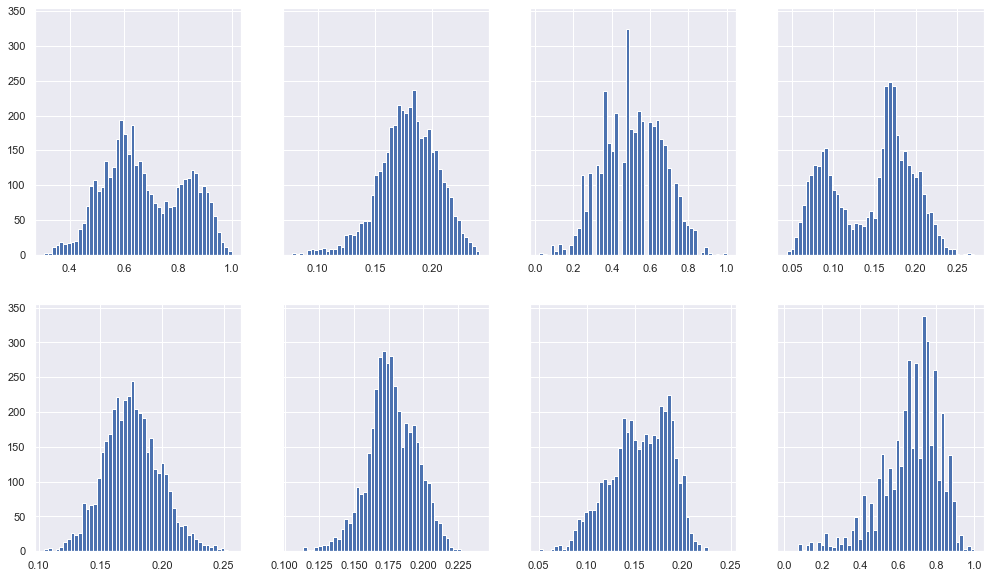

In [3]:
fig, axes = plt.subplots(2,4, figsize=(17, 10), sharey=True)
df['attack_contribution'].hist(bins=50,ax=axes[0][0])
df['Pace'].hist(bins=50,ax=axes[0][1])
df['Player_Height'].hist(bins=50,ax=axes[0][2])
df['Defending'].hist(bins=50,ax=axes[0][3])
df['Physicality'].hist(bins=50,ax=axes[1][0])
df['Dribbling'].hist(bins=50,ax=axes[1][1])
df['Shooting'].hist(bins=50,ax=axes[1][2])
df['Vision'].hist(bins=50,ax=axes[1][3])

#### Conclutions👨🏿‍🏫:
 * most of The data is normally distributed

## the correlation part 🌉

In [4]:
correlations=[]
arr=[]
cols1=df.columns
cols2=df.columns
i=0
for col1 in cols1:
    j=0
    for col2 in cols2:
        if col1==col2:
            break
        if df[col1].corr(df[col2])>=0.5 or df[col1].corr(df[col2])>=0.5:
            arr.append(f"({df.columns[i]}, {df.columns[j]})")
        j+=1
    i+=1
print(arr)

# function that returns tupls of high correlation attributes

['(Dribbling, Shooting)', '(Dribbling, Passing)', '(Defending, Position)', '(Physicality, Defending)', '(Agility, Pace)', '(Agility, Dribbling)', '(Balance, Dribbling)', '(Balance, Agility)', '(Marking, Position)', '(Marking, Defending)', '(Positioning, Shooting)', '(Positioning, Passing)', '(Positioning, Dribbling)', '(Positioning, Agility)', '(Positioning, Balance)', '(Sprint_Speed, Pace)', '(Sprint_Speed, Agility)', '(Vision, Shooting)', '(Vision, Passing)', '(Vision, Dribbling)', '(Vision, Agility)', '(Vision, Positioning)', '(Finishing, Shooting)', '(Finishing, Dribbling)', '(Finishing, Positioning)', '(Finishing, Vision)', '(Player_Height, Physicality)', '(attack_contribution, Pace)', '(attack_contribution, Shooting)', '(attack_contribution, Dribbling)', '(attack_contribution, Agility)', '(attack_contribution, Balance)', '(attack_contribution, Positioning)', '(attack_contribution, Finishing)']


In [5]:
df.corr()

Position      Pace  Shooting   Passing  Dribbling  \
Position             1.000000 -0.291591 -0.866351 -0.380277  -0.714768   
Pace                -0.291591  1.000000  0.113362 -0.180652   0.376035   
Shooting            -0.866351  0.113362  1.000000  0.458184   0.643825   
Passing             -0.380277 -0.180652  0.458184  1.000000   0.615665   
Dribbling           -0.714768  0.376035  0.643825  0.615665   1.000000   
Defending            0.897729 -0.499817 -0.861150 -0.424680  -0.814137   
Physicality          0.396710 -0.362494 -0.457306 -0.690268  -0.755216   
Agility             -0.456513  0.569345  0.390073  0.405213   0.721158   
Balance             -0.335282  0.418313  0.288676  0.429125   0.632865   
Marking              0.847496 -0.468015 -0.793786 -0.326385  -0.725488   
Positioning         -0.765860  0.194613  0.799966  0.521484   0.684534   
Sprint_Speed        -0.237896  0.897090  0.101263 -0.144632   0.291781   
Vision              -0.503290 -0.110160  0.562056  0.816662   0.600960   
Finishing           -0.836893  0.159071  0.941710  0.445862   0.647584   
Player_Height        0.264550 -0.375184 -0.231324 -0.403193  -0.548994   
attack_contribution -0.834579  0.581631  0.776481  0.444637   0.861156   

                     Defending  Physicality   Agility   Balance   Marking  \
Position              0.897729     0.396710 -0.456513 -0.335282  0.847496   
Pace                 -0.499817    -0.362494  0.569345  0.418313 -0.468015   
Shooting             -0.861150    -0.457306  0.390073  0.288676 -0.793786   
Passing              -0.424680    -0.690268  0.405213  0.429125 -0.326385   
Dribbling            -0.814137    -0.755216  0.721158  0.632865 -0.725488   
Defending             1.000000     0.511118 -0.572314 -0.422301  0.948603   
Physicality           0.511118     1.000000 -0.781363 -0.745381  0.356578   
Agility              -0.572314    -0.781363  1.000000  0.833176 -0.426758   
Balance              -0.422301    -0.745381  0.833176  1.000000 -0.275961   
Marking               0.948603     0.356578 -0.426758 -0.275961  1.000000   
Positioning          -0.748643    -0.594175  0.599632  0.508146 -0.603703   
Sprint_Speed         -0.405849    -0.392813  0.605277  0.450269 -0.303560   
Vision               -0.475317    -0.660651  0.502880  0.484814 -0.319403   
Finishing            -0.818505    -0.514978  0.496594  0.382610 -0.713210   
Player_Height         0.349948     0.691394 -0.740014 -0.860544  0.231251   
attack_contribution  -0.958215    -0.627735  0.746789  0.571369 -0.917145   

                     Positioning  Sprint_Speed    Vision  Finishing  \
Position               -0.765860     -0.237896 -0.503290  -0.836893   
Pace                    0.194613      0.897090 -0.110160   0.159071   
Shooting                0.799966      0.101263  0.562056   0.941710   
Passing                 0.521484     -0.144632  0.816662   0.445862   
Dribbling               0.684534      0.291781  0.600960   0.647584   
Defending              -0.748643     -0.405849 -0.475317  -0.818505   
Physicality            -0.594175     -0.392813 -0.660651  -0.514978   
Agility                 0.599632      0.605277  0.502880   0.496594   
Balance                 0.508146      0.450269  0.484814   0.382610   
Marking                -0.603703     -0.303560 -0.319403  -0.713210   
Positioning             1.000000      0.314280  0.722545   0.864483   
Sprint_Speed            0.314280      1.000000  0.051763   0.220608   
Vision                  0.722545      0.051763  1.000000   0.636382   
Finishing               0.864483      0.220608  0.636382   1.000000   
Player_Height          -0.409675     -0.365321 -0.391992  -0.292987   
attack_contribution     0.729236      0.485427  0.484453   0.763769   

                     Player_Height  attack_contribution  
Position                  0.264550            -0.834579  
Pace                     -0.375184             0.581631  
Shooting                 -0.231324             0.776481  
Passing     

Text(0.5, 1.0, 'The correlation  matrix')

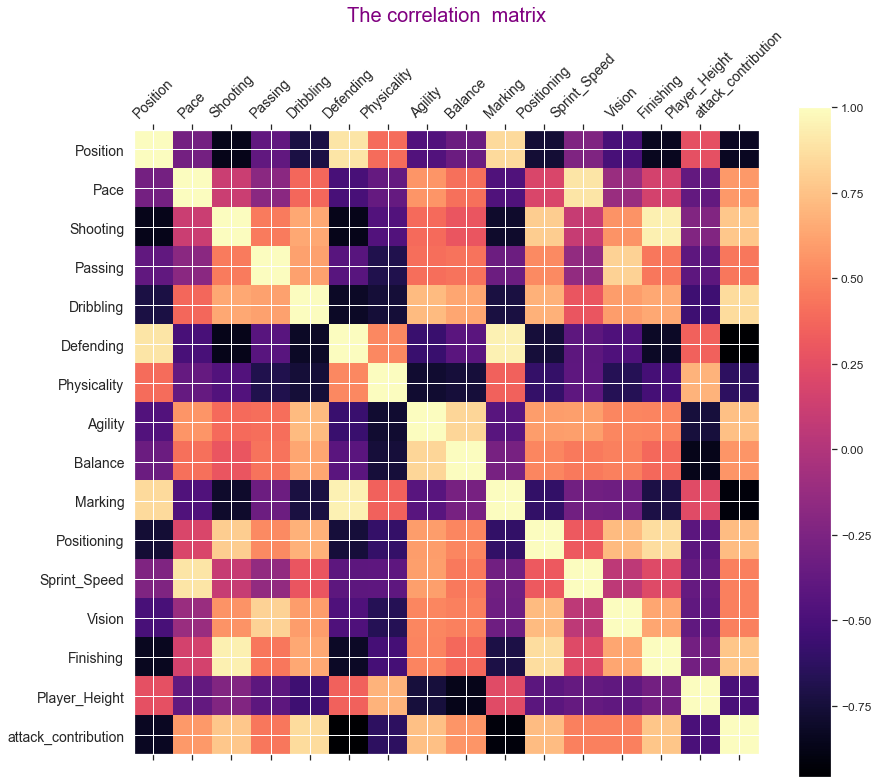

In [6]:
f = plt.figure(figsize=(14, 12))
plt.matshow(df.corr(), fignum=f.number, cmap = 'magma')

plt.xticks(range(df.select_dtypes(['number']).shape[1]),
           df.select_dtypes(['number']).columns, fontsize=14, rotation=45)

plt.yticks(range(df.select_dtypes(['number']).shape[1]),
           df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title("The correlation  matrix", fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': 'purple'})

# 📊 EDA Part 📊
 * Analyze the position distribution of players
 * Analyze the relationships between attributes

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([<AxesSubplot:>], dtype=object)

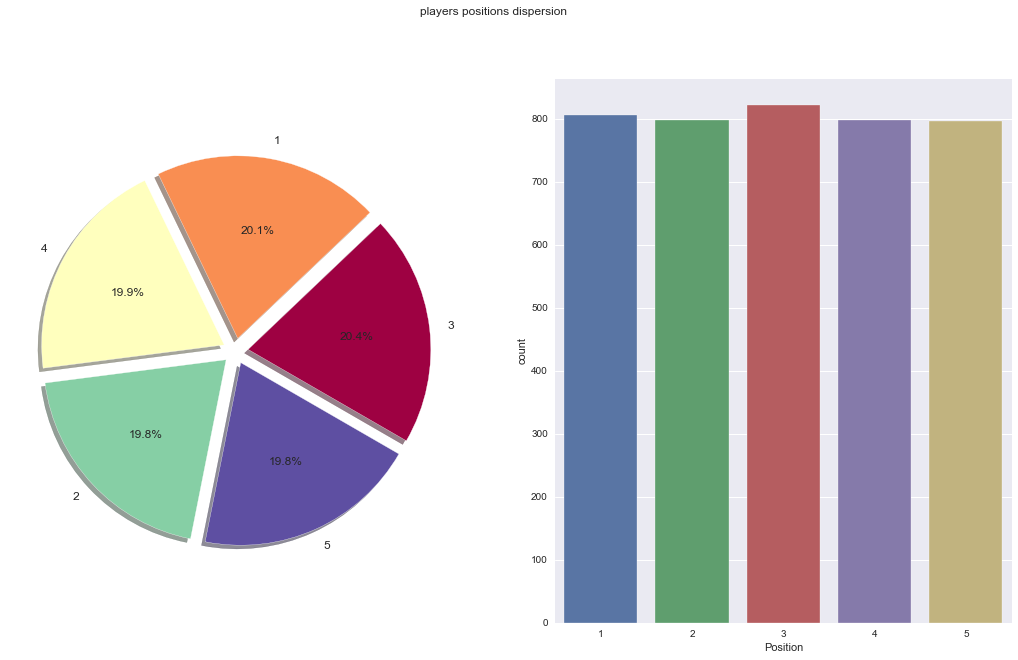

In [7]:
explode = (0.07, 0.07, 0.07, 0.07, 0.07)
plt.style.use('seaborn')
fig, axes = plt.subplots(1,2, figsize=(18,10))

sns.countplot(df["Position"])
df['Position'].value_counts().plot(ax=axes[0], kind='pie', ylabel='', subplots=True,cmap='Spectral', shadow=True,
                                    explode=explode, autopct='%1.1f%%', startangle=-30,
                                    title=('players positions dispersion'), fontsize=12)


# plots of the dispersion of players positions

<AxesSubplot:xlabel='Position', ylabel='attack_contribution'>

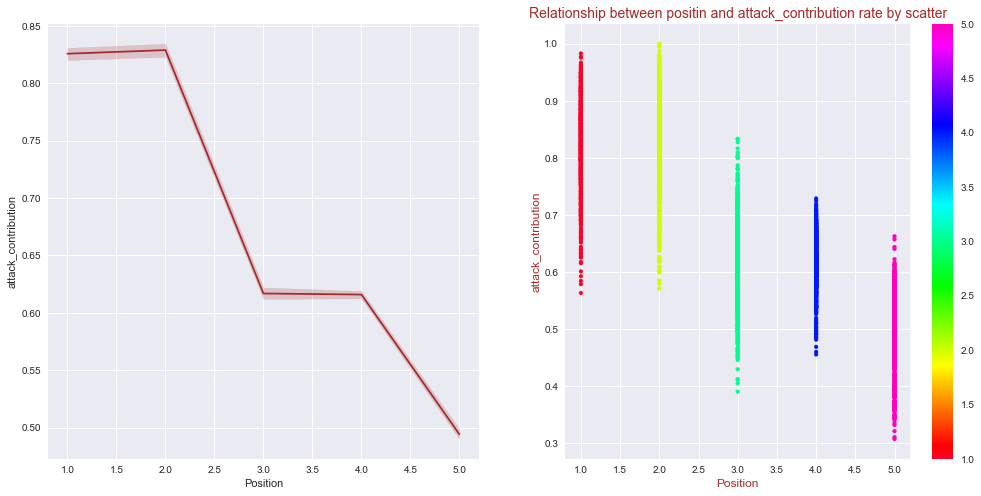

In [8]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6
plt.scatter(df["Position"], df["attack_contribution"],
            c=df["Position"], cmap='gist_rainbow', s=15)
plt.title('Relationship between positin and attack_contribution rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'brown'})
plt.xlabel('Position',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'brown'})
plt.ylabel('attack_contribution',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'brown'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='attack_contribution', data=df, color="brown")

##### Conclutions👨🏿‍🏫:
 * Since the player is more in front of the field, he is more likely to contribute to the attack

<AxesSubplot:xlabel='Position', ylabel='Pace'>

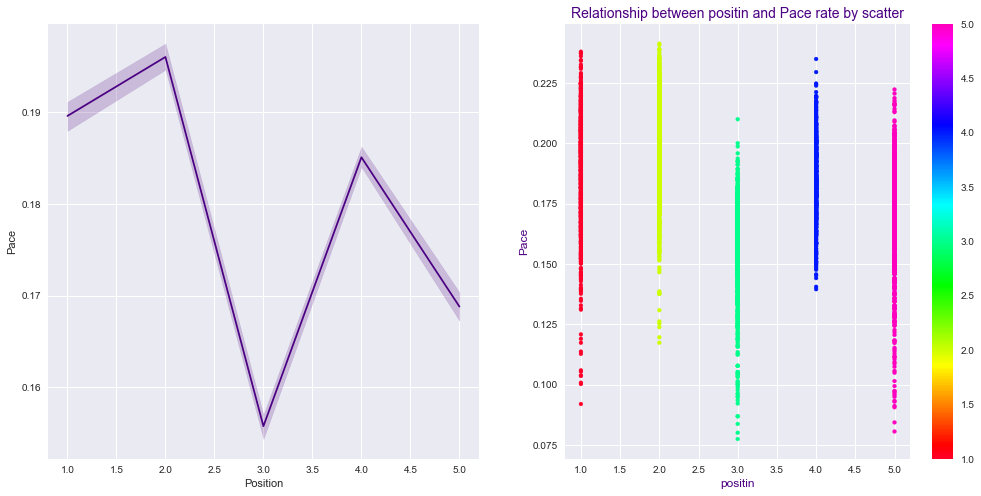

In [9]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6
plt.scatter(df["Position"], df["Pace"],
            c=df["Position"], cmap='gist_rainbow', s=15)
plt.title('Relationship between positin and Pace rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'indigo'})
plt.xlabel('positin',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'indigo'})
plt.ylabel('Pace',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'indigo'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Pace', data=df, color="indigo")


##### Conclutions👨🏿‍🏫:
 * player In the defensive position: LB, RB, LWB, RWB, are the fastest
 * player In the attack position: RF, RW, LF, LW, CAM are the fastest
 

<AxesSubplot:xlabel='Position', ylabel='Defending'>

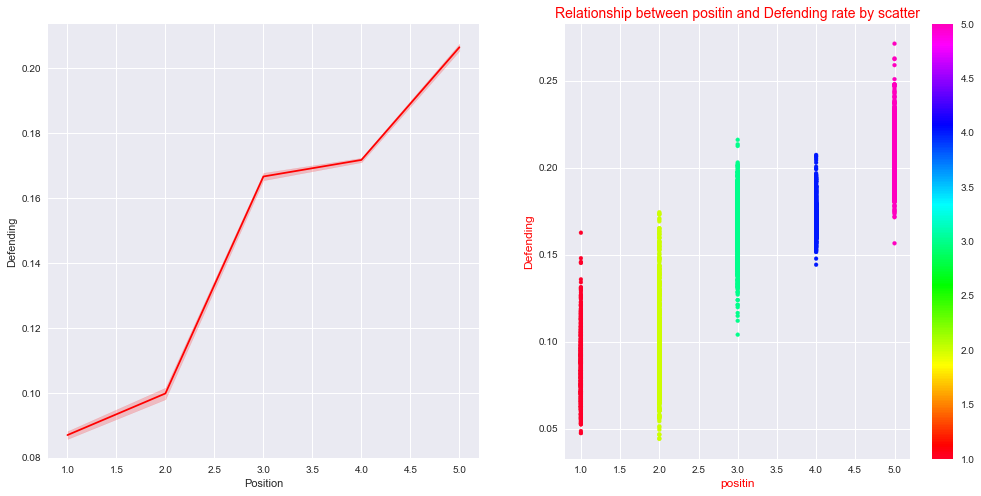

In [10]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6
plt.scatter(df["Position"], df["Defending"],
            c=df["Position"], cmap='gist_rainbow', s=15)
plt.title('Relationship between positin and Defending rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'red'})
plt.xlabel('positin',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'red'})
plt.ylabel('Defending',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'red'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Defending', data=df, color="red")

##### Conclutions👨🏿‍🏫:
 * When a player's defense attribute is higher, he is more at the back of the field exept except:
 * LB 
 * RB 
 * LWB
 * RWB

<AxesSubplot:xlabel='Position', ylabel='Shooting'>

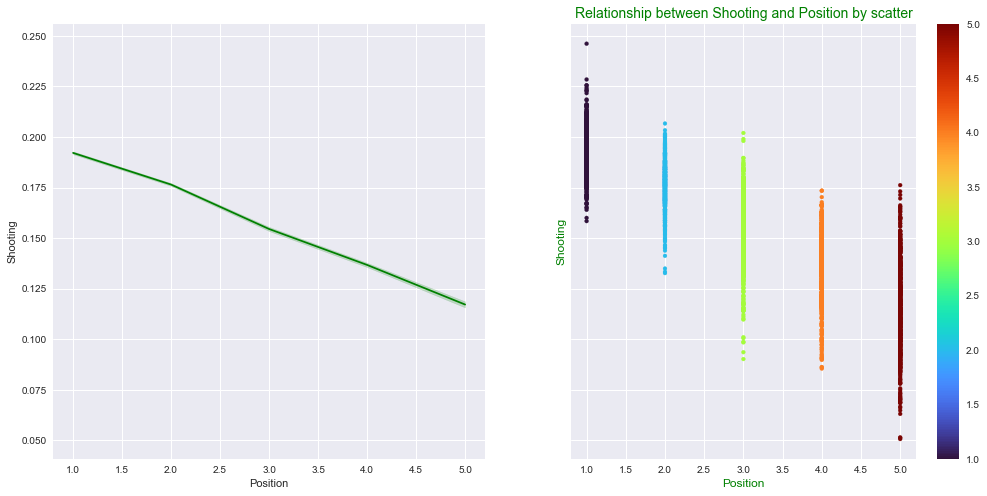

In [11]:
fig, axes = plt.subplots(1,2, figsize=(17, 8), sharey=True)
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Position"], df["Shooting"],
            c=df["Position"], cmap='turbo', s=15)

plt.title('Relationship between Shooting and Position by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'green'})

plt.xlabel('Position',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'green'})

plt.ylabel('Shooting',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'green'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Shooting', data=df, color="green")

##### Conclutions👨🏿‍🏫:
 * When a player's Shooting attribute is higher, he is more at the front of the field like strikers or wings

<AxesSubplot:xlabel='Position', ylabel='Agility'>

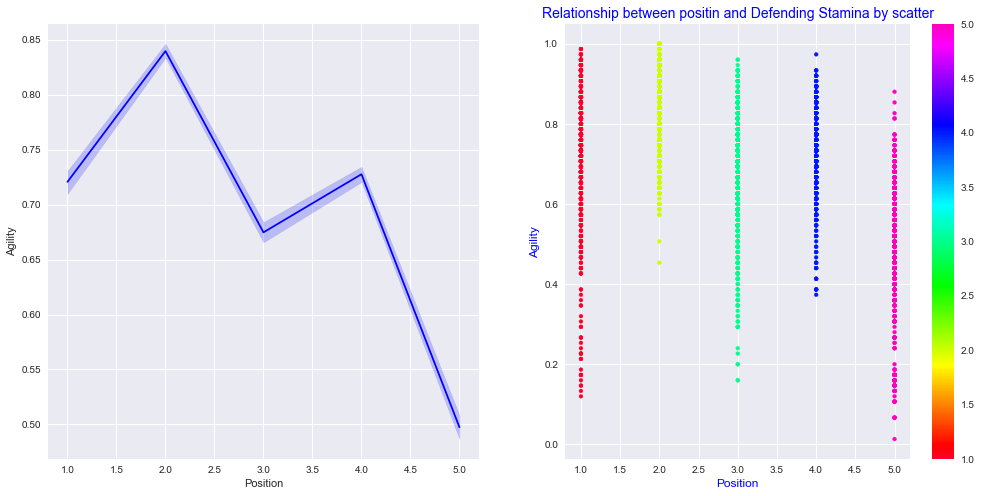

In [12]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Position"], df["Agility"],
            c=df["Position"], cmap='gist_rainbow', s=15)

plt.title('Relationship between positin and Defending Stamina by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'blue'})

plt.xlabel('Position',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'blue'})

plt.ylabel('Agility',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'blue'})

plt.colorbar()

sns.lineplot(ax=axes[0] ,x='Position', y='Agility', data=df, color="blue")

##### Conclutions👨🏿‍🏫:
 * This graph does not provide a conclusive conclusion, but we can see that if a player has high stamina, he will probably be near the front of the field. 

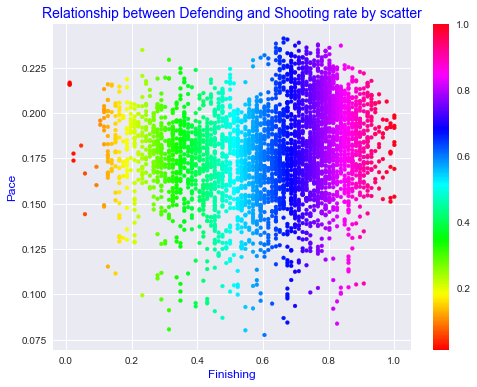

In [13]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Finishing"], df["Pace"],
            c=df["Finishing"], cmap='hsv', s=15)

plt.title('Relationship between Defending and Shooting rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'blue'})

plt.xlabel('Finishing',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'blue'})

plt.ylabel('Pace',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'blue'})

plt.colorbar()

##### Conclutions👨🏿‍🏫:
 * This graph does not provide a conclusive conclusion

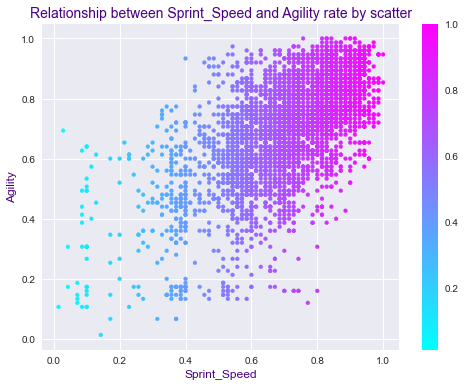

In [14]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Sprint_Speed"], df["Agility"],
            c=df["Sprint_Speed"], cmap='cool', s=15)

plt.title('Relationship between Sprint_Speed and Agility rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'indigo'})

plt.xlabel('Sprint_Speed',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'indigo'})

plt.ylabel('Agility',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'indigo'})

plt.colorbar()

##### Conclutions👨🏿‍🏫:
 * Having a high sprint speed will result in greater agility performances

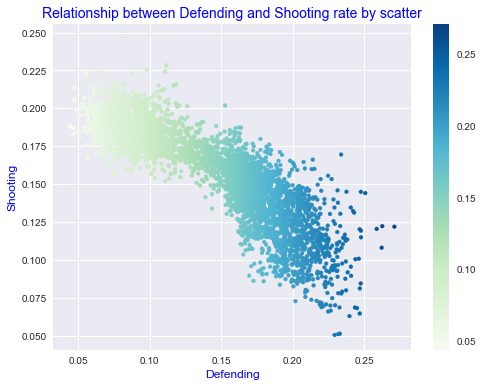

In [15]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Defending"], df["Shooting"],
            c=df["Defending"], cmap='GnBu', s=15)

plt.title('Relationship between Defending and Shooting rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'blue'})

plt.xlabel('Defending',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'blue'})

plt.ylabel('Shooting',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'blue'})

plt.colorbar()

##### Conclutions👨🏿‍🏫:
 * A player with a high defensive attribute will shoot less well

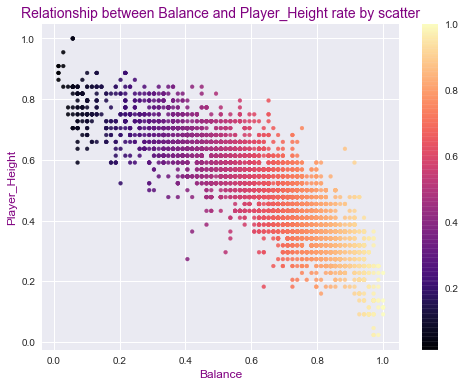

In [16]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Balance"], df["Player_Height"],alpha=0.9,
            c=df["Balance"], cmap='magma', s=15)

plt.title('Relationship between Balance and Player_Height rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'purple'})

plt.xlabel('Balance',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'purple'})

plt.ylabel('Player_Height',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'purple'})

plt.colorbar()


##### Conclutions👨🏿‍🏫:
 * This graph does not provide a conclusive conclusion, but we can see that if a player is shorter he probably will be balanced

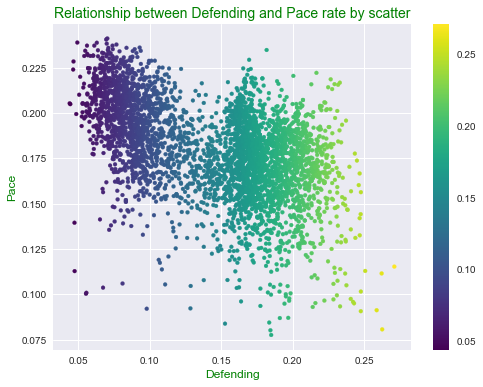

In [17]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Defending"], df["Pace"],
            c=df["Defending"], cmap='viridis', s=15)

plt.title('Relationship between Defending and Pace rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'green'})

plt.xlabel('Defending',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'green'})

plt.ylabel('Pace',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'green'})

plt.colorbar()

##### Conclutions👨🏿‍🏫:
 * This graph does not provide a conclusive conclusion

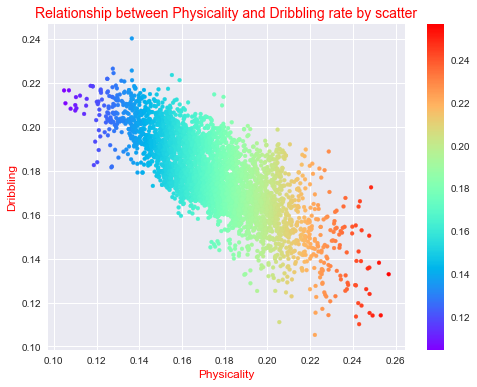

In [18]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Physicality"], df["Dribbling"],
            c=df["Physicality"], cmap='rainbow', s=15)

plt.title('Relationship between Physicality and Dribbling rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'medium', 'color': 'red'})

plt.xlabel('Physicality',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'red'})

plt.ylabel('Dribbling',
          fontdict={'fontsize': 12, 'fontweight': 'medium', 'color': 'red'})

plt.colorbar()

##### Conclutions👨🏿‍🏫:
 * A player with a high Physicality attribute he will Dribbling less well 

Text(0.5, 0, 'Position')

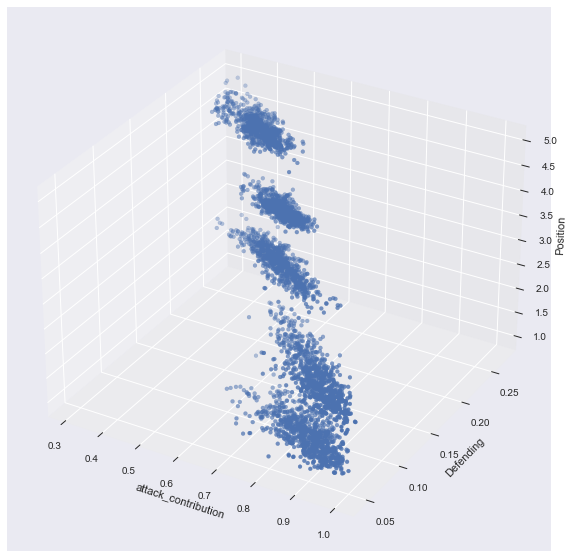

In [20]:
graph3d = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
graph3d.scatter(df['attack_contribution'], df['Defending'], df['Position'], cmap='hot', s=15)
graph3d.set_xlabel('attack_contribution')
graph3d.set_ylabel('Defending')
graph3d.set_zlabel('Position')